In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sp
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

# Data cleaning and visualisation

In [2]:
loan=pd.read_csv("lendingloans.csv")

In [3]:
loan.shape

(42542, 115)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42541,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [7]:
loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [8]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)

In [9]:
loan.isnull().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64

In [10]:
loan.isnull().sum().sort_values(ascending=False).head(60)

annual_inc_joint                  42542
mo_sin_rcnt_rev_tl_op             42542
mo_sin_old_il_acct                42542
bc_util                           42542
bc_open_to_buy                    42542
avg_cur_bal                       42542
acc_open_past_24mths              42542
inq_last_12m                      42542
total_cu_tl                       42542
inq_fi                            42542
total_rev_hi_lim                  42542
all_util                          42542
max_bal_bc                        42542
open_rv_24m                       42542
open_rv_12m                       42542
il_util                           42542
total_bal_il                      42542
mths_since_rcnt_il                42542
open_il_24m                       42542
open_il_12m                       42542
open_il_6m                        42542
open_acc_6m                       42542
tot_cur_bal                       42542
tot_coll_amt                      42542
verification_status_joint         42542


In [11]:
half_count=len(loan)/2
loan.dropna(thresh=half_count,axis=1,inplace=True)

In [12]:
loan.shape

(42542, 58)

In [13]:
loan.isnull().sum().sort_values(ascending=False)

desc                          13300
emp_title                      2633
pub_rec_bankruptcies           1372
emp_length                     1119
chargeoff_within_12_mths        152
collections_12_mths_ex_med      152
tax_liens                       112
revol_util                       97
last_pymnt_d                     90
delinq_amnt                      36
acc_now_delinq                   36
total_acc                        36
pub_rec                          36
open_acc                         36
earliest_cr_line                 36
delinq_2yrs                      36
inq_last_6mths                   36
title                            20
annual_inc                       11
last_credit_pull_d               11
pymnt_plan                        7
last_fico_range_high              7
total_rec_int                     7
total_rec_late_fee                7
recoveries                        7
collection_recovery_fee           7
installment                       7
last_pymnt_amnt             

In [14]:
loan.nunique().sort_values(ascending=False).head(58)

id                            42538
member_id                     42535
url                           42535
total_pymnt                   40579
total_pymnt_inv               40108
total_rec_int                 37533
last_pymnt_amnt               37117
emp_title                     30658
desc                          28963
revol_bal                     22709
title                         21253
installment                   16459
funded_amnt_inv                9240
total_rec_prncp                8214
annual_inc                     5597
recoveries                     4530
dti                            2894
collection_recovery_fee        2857
total_rec_late_fee             1562
revol_util                     1119
funded_amnt                    1051
loan_amnt                       898
zip_code                        837
out_prncp_inv                   548
out_prncp                       547
earliest_cr_line                530
int_rate                        394
last_credit_pull_d          

In [15]:
loan=loan.drop(['id','member_id','url',"desc","pub_rec_bankruptcies"], axis = 1)

In [16]:
loan.shape

(42542, 53)

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

In [18]:
loan.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

In [19]:
loan.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [20]:
loan.loan_status.value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [21]:
loan.int_rate.value_counts()

10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64

In [22]:
loan["int_rate"]=loan["int_rate"].str.rstrip("%").astype(float)

In [23]:
loan.int_rate.value_counts()

10.99    970
11.49    837
13.49    832
7.51     787
7.88     742
        ... 
17.46      1
21.48      1
24.40      1
16.83      1
16.20      1
Name: int_rate, Length: 394, dtype: int64

In [24]:
loan.emp_length.value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [25]:
loan.loan_status.value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [26]:
loan.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [27]:
loan.pub_rec.value_counts()

0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [28]:
loan.home_ownership.value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [29]:
loan.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

In [30]:
loan.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

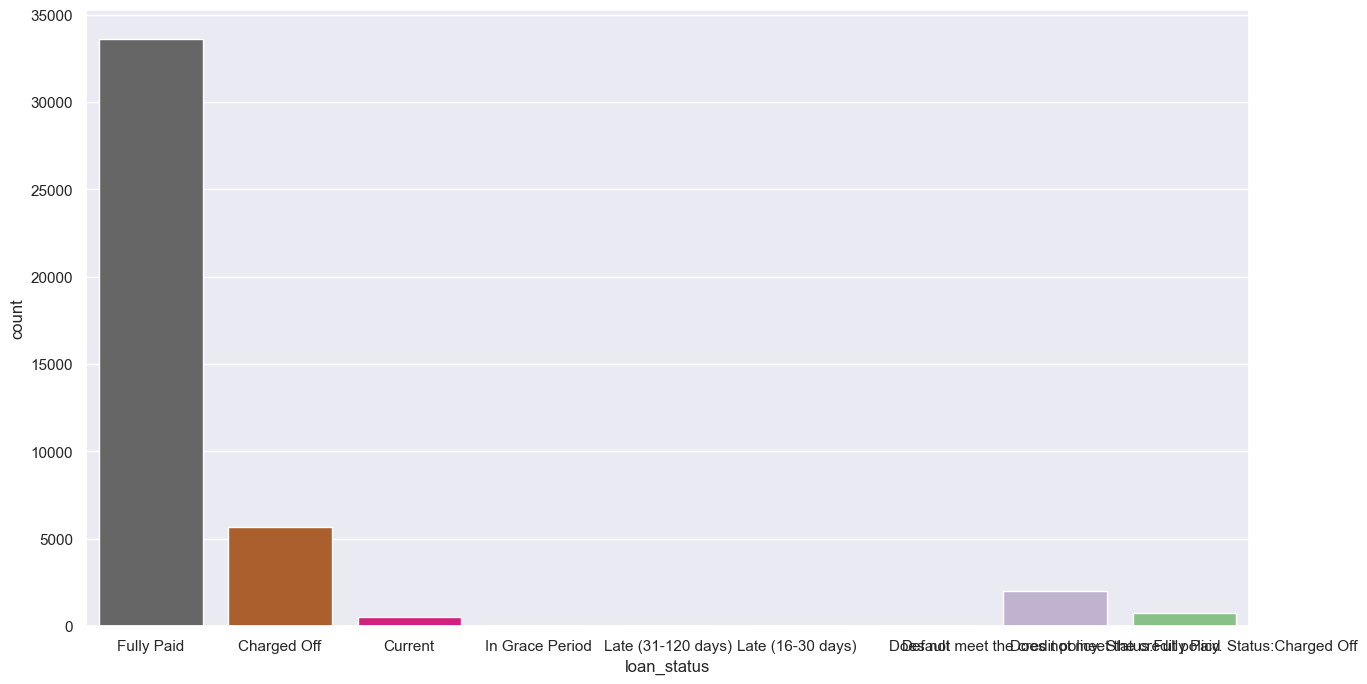

In [31]:
plt.figure(figsize=(15,8))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.countplot(x=loan['loan_status'], data=loan, palette="Accent_r")
plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

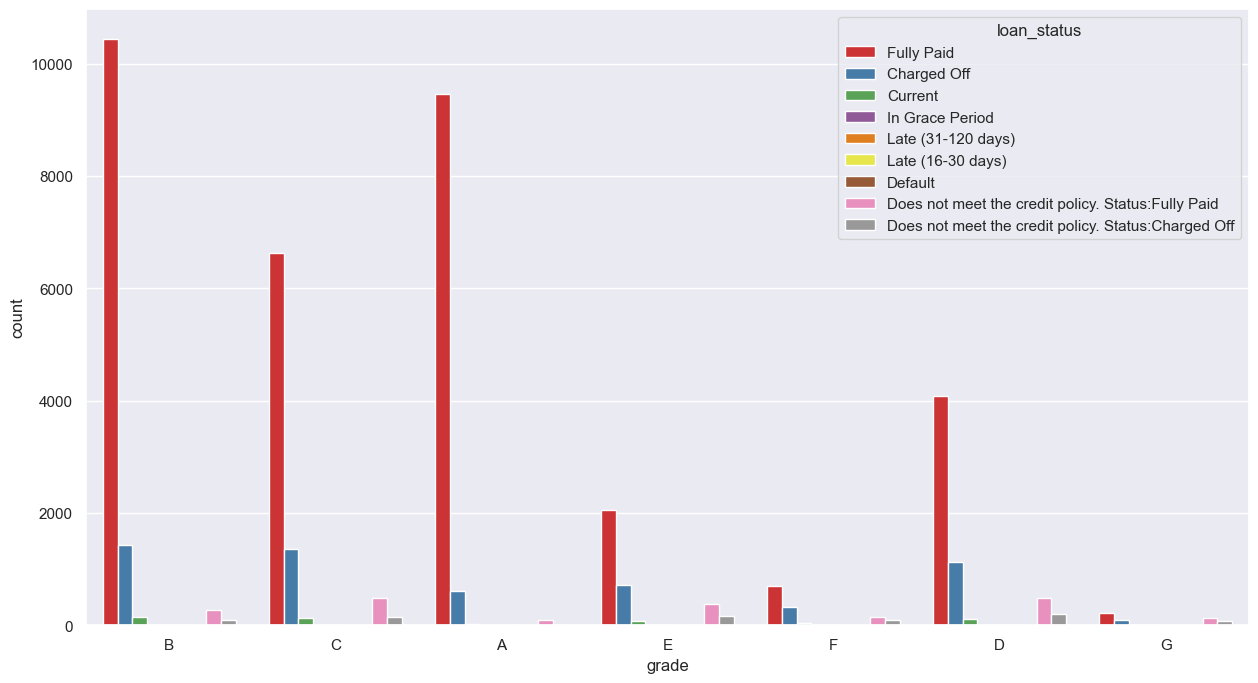

In [32]:
plt.figure(figsize=(15,8))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.countplot(x="grade",hue="loan_status", data=loan, palette="Set1")

distribution of loan satus according to grade

<AxesSubplot:xlabel='verification_status', ylabel='count'>

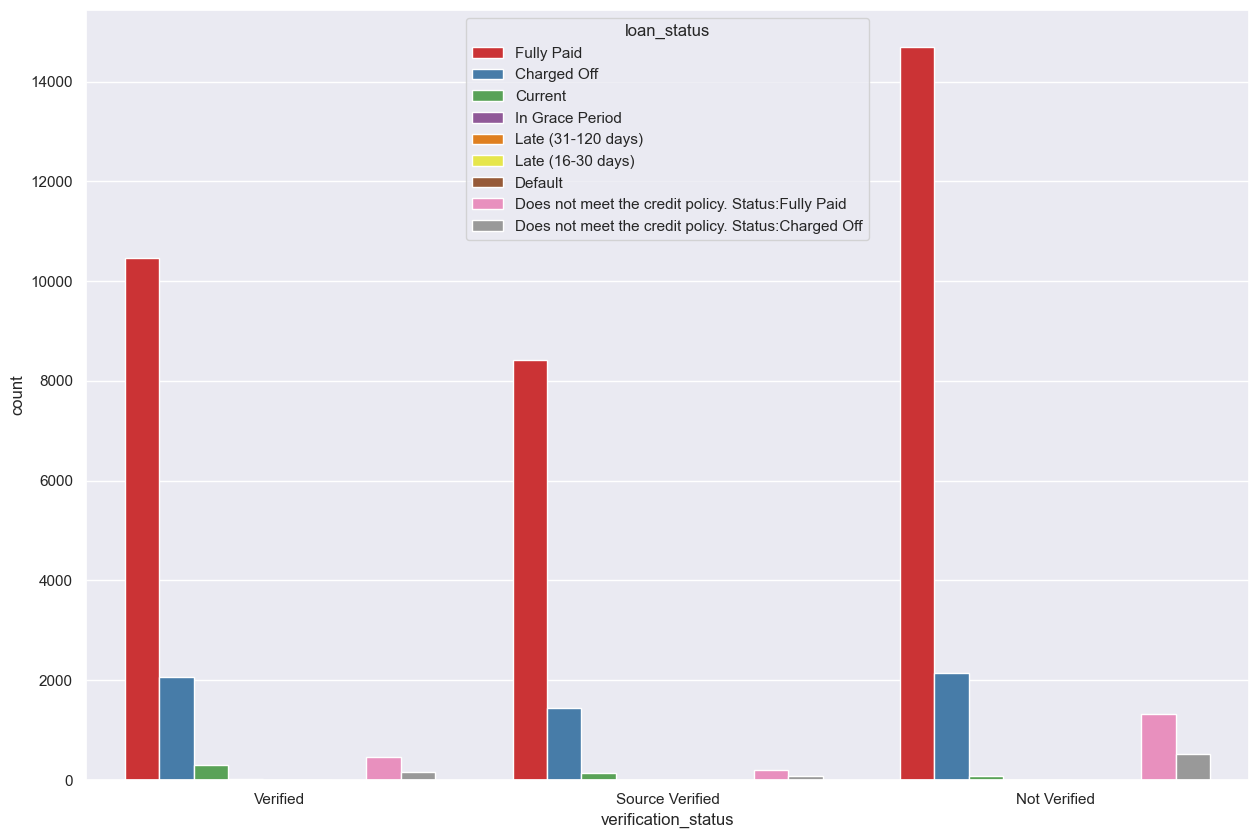

In [33]:
plt.figure(figsize=(15,10))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.countplot(x="verification_status",hue="loan_status", data=loan, palette="Set1")

verification satus not affecting on loan status

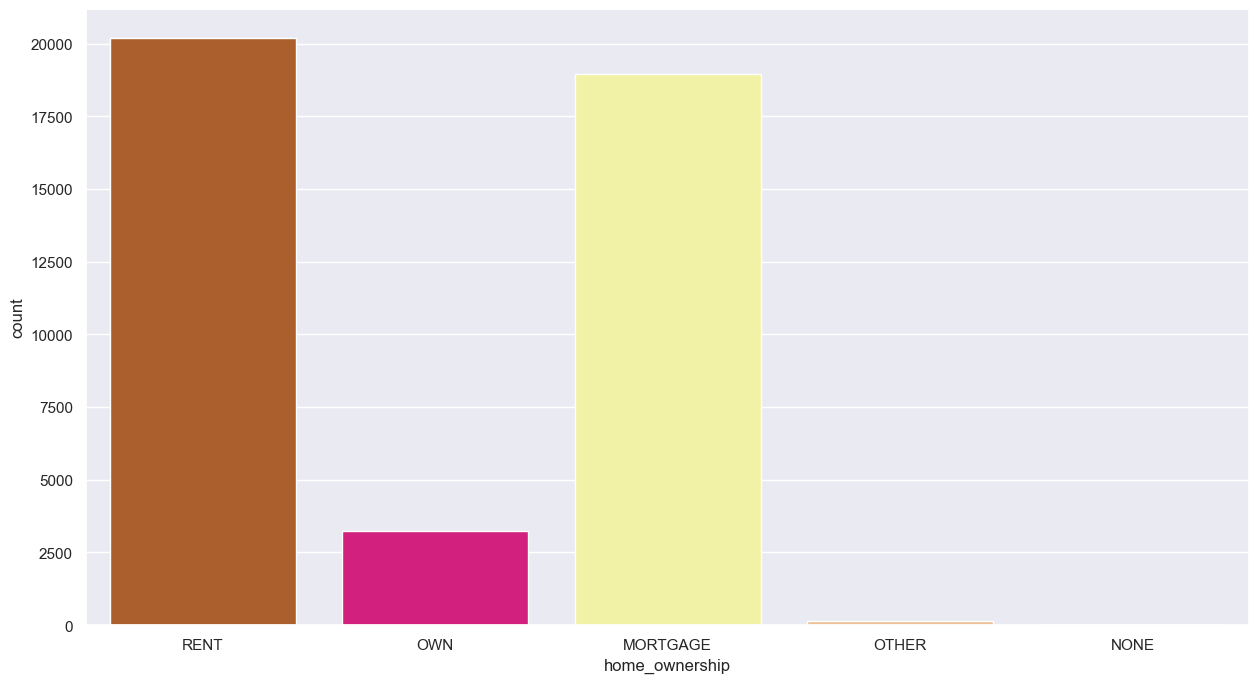

In [34]:
plt.figure(figsize=(15,8))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.countplot(x=loan['home_ownership'], data=loan, palette="Accent_r")
plt.show()

distribution of homeownership

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

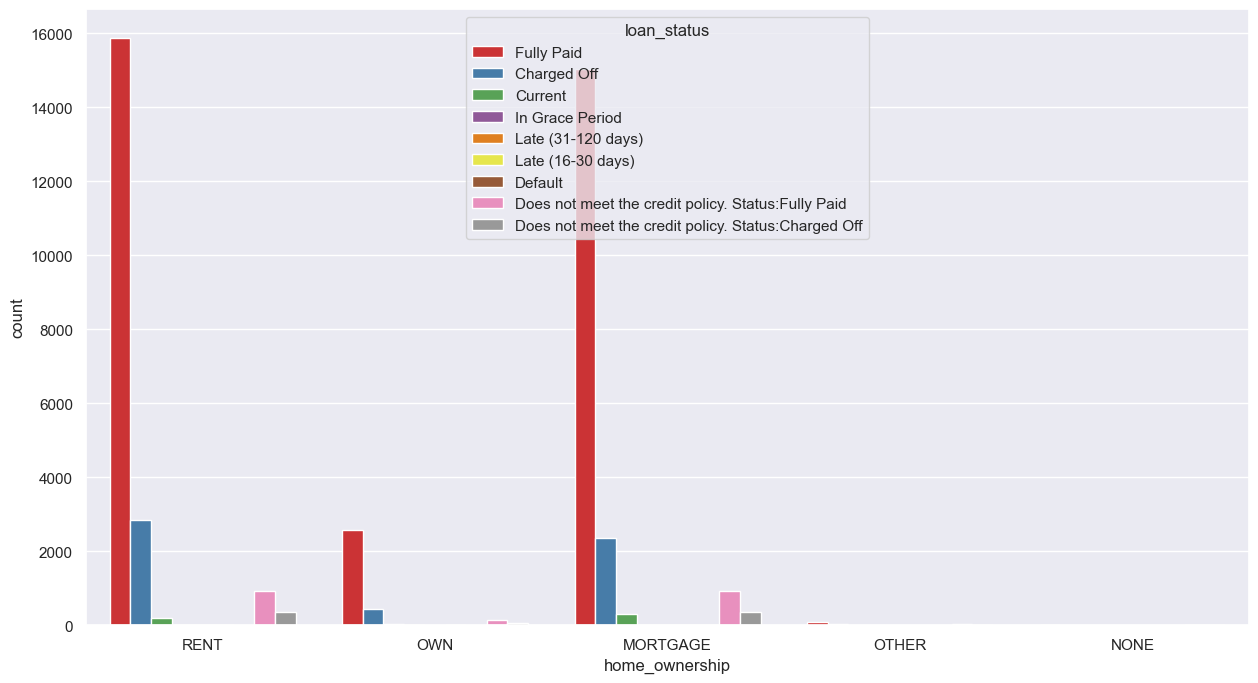

In [35]:
plt.figure(figsize=(15,8))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.countplot(x="home_ownership",hue="loan_status", data=loan, palette="Set1")

mortage and rent people are fully paid there loans 

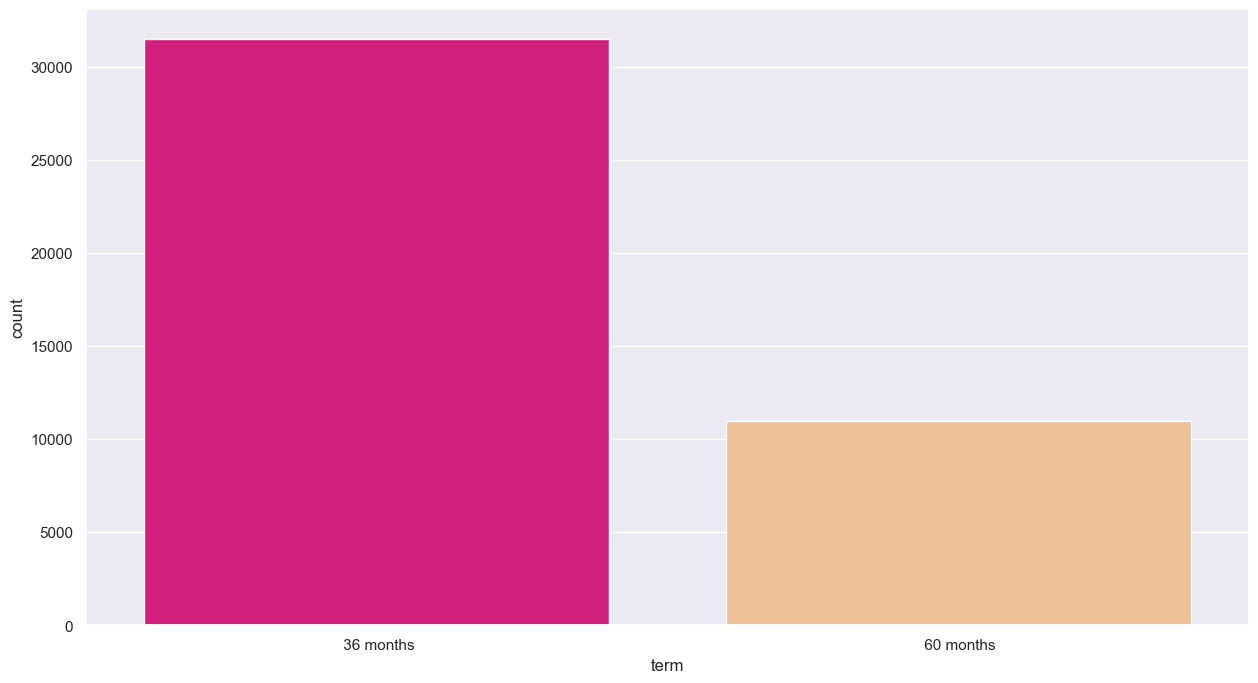

In [36]:
plt.figure(figsize=(15,8))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.countplot(x=loan['term'], data=loan, palette="Accent_r")
plt.show()

loan term more for 36 months 

In [37]:
from sklearn.preprocessing import LabelEncoder 
label_encoder=LabelEncoder()

In [38]:
loan["emp_length"]=label_encoder.fit_transform(loan["emp_length"])

In [39]:
loan.emp_length.value_counts()

1     9369
10    5062
2     4743
3     4364
4     3649
0     3595
5     3458
6     2375
7     1875
8     1592
9     1341
11    1119
Name: emp_length, dtype: int64

In [40]:
loan["loan_status"]=label_encoder.fit_transform(loan["loan_status"])

In [41]:
loan.loan_status.value_counts()

5    33586
0     5653
4     1988
3      761
1      513
6       16
8       12
9        7
7        5
2        1
Name: loan_status, dtype: int64

In [42]:
loan["grade"]=label_encoder.fit_transform(loan["grade"])

In [43]:
loan.grade.value_counts()

1    12389
0    10183
2     8740
3     6016
4     3394
5     1301
6      512
7        7
Name: grade, dtype: int64

In [44]:
loan["pub_rec"]=label_encoder.fit_transform(loan["pub_rec"])

In [45]:
loan.pub_rec.value_counts()

0    40130
1     2298
2       64
6       36
3       11
4        2
5        1
Name: pub_rec, dtype: int64

In [46]:
loan["home_ownership"]=label_encoder.fit_transform(loan["home_ownership"])

In [47]:
loan.home_ownership.value_counts()

4    20181
0    18959
3     3251
2      136
1        8
5        7
Name: home_ownership, dtype: int64

In [48]:
loan["verification_status"]=label_encoder.fit_transform(loan["verification_status"])

In [49]:
loan.verification_status.value_counts()

0    18758
2    13471
1    10306
3        7
Name: verification_status, dtype: int64

In [50]:
loan["term"]=label_encoder.fit_transform(loan["term"])

In [51]:
loan.term.value_counts()

0    31534
1    11001
2        7
Name: term, dtype: int64

In [52]:
loan["sub_grade"]=label_encoder.fit_transform(loan["sub_grade"])

In [53]:
loan.sub_grade.value_counts()

7     2997
3     2905
9     2807
4     2793
8     2590
10    2264
11    2157
6     2113
5     1882
2     1823
12    1658
1     1520
16    1485
13    1370
17    1322
14    1291
0     1142
18    1140
15    1053
19    1016
20     884
21     791
22     668
23     552
24     499
25     392
26     308
27     236
28     211
29     154
30     141
31     107
33      99
34      86
32      79
35       7
Name: sub_grade, dtype: int64

In [54]:
loan.corr()['loan_status']

loan_amnt                    -0.067351
funded_amnt                  -0.065642
funded_amnt_inv              -0.043115
term                         -0.177807
int_rate                     -0.221178
installment                  -0.033389
grade                        -0.205840
sub_grade                    -0.208647
emp_length                   -0.001839
home_ownership               -0.015467
annual_inc                    0.035714
verification_status          -0.047328
loan_status                   1.000000
dti                          -0.048634
delinq_2yrs                  -0.020433
fico_range_low                0.135751
fico_range_high               0.135751
inq_last_6mths               -0.087611
open_acc                      0.003863
pub_rec                      -0.033302
revol_bal                    -0.019955
total_acc                     0.018839
out_prncp                    -0.150830
out_prncp_inv                -0.150778
total_pymnt                   0.197084
total_pymnt_inv          

In [55]:
loan.nunique().sort_values(ascending=True)

chargeoff_within_12_mths          1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         2
acc_now_delinq                    2
pymnt_plan                        2
term                              3
delinq_amnt                       3
verification_status               4
home_ownership                    6
pub_rec                           7
grade                             8
loan_status                      10
emp_length                       12
delinq_2yrs                      12
purpose                          14
inq_last_6mths                   28
sub_grade                        36
fico_range_high                  44
fico_range_low                   44
open_acc                         44
addr_state                       50
issue_d                          55
last_fico_range_low              71
last_fico_range_high             72
total_acc                   

In [56]:
loan=loan.drop(['chargeoff_within_12_mths','policy_code','collections_12_mths_ex_med',"initial_list_status","application_type"], axis = 1)

In [57]:
loan.shape

(42542, 48)

In [58]:
loan.corr()['loan_status'].sort_values(ascending=False)

loan_status                1.000000
last_fico_range_high       0.471377
last_fico_range_low        0.423125
total_rec_prncp            0.300676
last_pymnt_amnt            0.226680
total_pymnt                0.197084
total_pymnt_inv            0.194918
fico_range_high            0.135751
fico_range_low             0.135751
annual_inc                 0.035714
total_acc                  0.018839
open_acc                   0.003863
tax_liens                 -0.000576
delinq_amnt               -0.000579
acc_now_delinq            -0.001154
emp_length                -0.001839
home_ownership            -0.015467
revol_bal                 -0.019955
delinq_2yrs               -0.020433
pub_rec                   -0.033302
installment               -0.033389
funded_amnt_inv           -0.043115
total_rec_int             -0.045533
verification_status       -0.047328
dti                       -0.048634
funded_amnt               -0.065642
loan_amnt                 -0.067351
inq_last_6mths            -0

In [59]:
loan.isnull().sum()

loan_amnt                     7
funded_amnt                   7
funded_amnt_inv               7
term                          0
int_rate                      7
installment                   7
grade                         0
sub_grade                     0
emp_title                  2633
emp_length                    0
home_ownership                0
annual_inc                   11
verification_status           0
issue_d                       7
loan_status                   0
pymnt_plan                    7
purpose                       7
title                        20
zip_code                      7
addr_state                    7
dti                           7
delinq_2yrs                  36
earliest_cr_line             36
fico_range_low                7
fico_range_high               7
inq_last_6mths               36
open_acc                     36
pub_rec                       0
revol_bal                     7
revol_util                   97
total_acc                    36
out_prnc

In [60]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                42535 non-null  float64
 1   funded_amnt              42535 non-null  float64
 2   funded_amnt_inv          42535 non-null  float64
 3   term                     42542 non-null  int32  
 4   int_rate                 42535 non-null  float64
 5   installment              42535 non-null  float64
 6   grade                    42542 non-null  int32  
 7   sub_grade                42542 non-null  int32  
 8   emp_title                39909 non-null  object 
 9   emp_length               42542 non-null  int32  
 10  home_ownership           42542 non-null  int32  
 11  annual_inc               42531 non-null  float64
 12  verification_status      42542 non-null  int32  
 13  issue_d                  42535 non-null  object 
 14  loan_status           

In [61]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [62]:
loan.dropna(inplace=True)

In [63]:
loan.shape

(39689, 48)

In [64]:
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [65]:
loan.corr()['loan_status'].sort_values(ascending=False)

loan_status                1.000000
last_fico_range_high       0.466961
last_fico_range_low        0.418683
total_rec_prncp            0.294994
last_pymnt_amnt            0.225285
total_pymnt                0.190631
total_pymnt_inv            0.189186
fico_range_low             0.135423
fico_range_high            0.135423
annual_inc                 0.032404
total_acc                  0.013689
emp_length                 0.010928
tax_liens                 -0.000679
delinq_amnt               -0.000679
acc_now_delinq            -0.001176
open_acc                  -0.002960
home_ownership            -0.015087
delinq_2yrs               -0.017026
revol_bal                 -0.022280
installment               -0.037499
pub_rec                   -0.046644
funded_amnt_inv           -0.047075
dti                       -0.049729
verification_status       -0.051055
total_rec_int             -0.051235
funded_amnt               -0.070543
loan_amnt                 -0.072341
inq_last_6mths            -0

In [66]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [67]:
loannew=loan.drop(['funded_amnt', 
       'installment', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_int', 'recoveries', 'last_pymnt_d',
       'last_credit_pull_d',
       'acc_now_delinq', 'delinq_amnt', 'tax_liens'], axis = 1)

In [68]:
loannew.shape

(39689, 20)

In [69]:
loannew.corr()['loan_status'].sort_values(ascending=False)

loan_status                1.000000
last_fico_range_high       0.466961
last_fico_range_low        0.418683
total_rec_prncp            0.294994
last_pymnt_amnt            0.225285
total_pymnt                0.190631
total_pymnt_inv            0.189186
fico_range_low             0.135423
fico_range_high            0.135423
funded_amnt_inv           -0.047075
loan_amnt                 -0.072341
inq_last_6mths            -0.087568
total_rec_late_fee        -0.152494
out_prncp_inv             -0.154060
out_prncp                 -0.154127
term                      -0.181892
collection_recovery_fee   -0.190308
grade                     -0.207455
sub_grade                 -0.210604
int_rate                  -0.220622
Name: loan_status, dtype: float64

In [70]:
loannew.corr()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,loan_status,fico_range_low,fico_range_high,inq_last_6mths,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low
loan_amnt,1.000000,0.928256,0.356731,0.291098,0.256641,0.266831,-0.072341,0.135480,0.135480,-0.031094,0.137259,0.137224,0.884671,0.844790,0.852564,0.041145,0.071462,0.448386,0.086091,0.074411
funded_amnt_inv,0.928256,1.000000,0.366330,0.279601,0.212422,0.220957,-0.047075,0.146386,0.146386,-0.076134,0.148357,0.148315,0.874508,0.914953,0.842182,0.017569,0.056222,0.442199,0.105966,0.095348
term,0.356731,0.366330,1.000000,0.430639,0.383043,0.391990,-0.181892,0.001046,0.001046,-0.013705,0.157659,0.157599,0.339239,0.361737,0.231270,0.006065,0.031722,0.236390,-0.057468,-0.047243
int_rate,0.291098,0.279601,0.430639,1.000000,0.939115,0.950515,-0.220622,-0.705573,-0.705573,0.178261,0.096641,0.096755,0.293322,0.281809,0.174400,0.097643,0.074882,0.149155,-0.312487,-0.247917
grade,0.256641,0.212422,0.383043,0.939115,1.000000,0.980997,-0.207455,-0.692659,-0.692659,0.216324,0.062391,0.062504,0.253934,0.219664,0.139260,0.111773,0.082647,0.121042,-0.300709,-0.242172
sub_grade,0.266831,0.220957,0.391990,0.950515,0.980997,1.000000,-0.210604,-0.708623,-0.708623,0.223052,0.063516,0.063638,0.262082,0.227290,0.146347,0.112559,0.083300,0.125194,-0.306971,-0.247103
loan_status,-0.072341,-0.047075,-0.181892,-0.220622,-0.207455,-0.210604,1.000000,0.135423,0.135423,-0.087568,-0.154127,-0.154060,0.190631,0.189186,0.294994,-0.152494,-0.190308,0.225285,0.466961,0.418683
fico_range_low,0.135480,0.146386,0.001046,-0.705573,-0.692659,-0.708623,0.135423,1.000000,1.000000,-0.135926,-0.000199,-0.000305,0.097198,0.112224,0.167276,-0.074521,-0.032954,0.086927,0.373209,0.291550
fico_range_high,0.135480,0.146386,0.001046,-0.705573,-0.692659,-0.708623,0.135423,1.000000,1.000000,-0.135926,-0.000199,-0.000305,0.097198,0.112224,0.167276,-0.074521,-0.032954,0.086927,0.373209,0.291550
inq_last_6mths,-0.031094,-0.076134,-0.013705,0.178261,0.216324,0.223052,-0.087568,-0.135926,-0.135926,1.000000,-0.019626,-0.019534,-0.055245,-0.085878,-0.069703,0.060516,0.039379,-0.006075,-0.127986,-0.108973


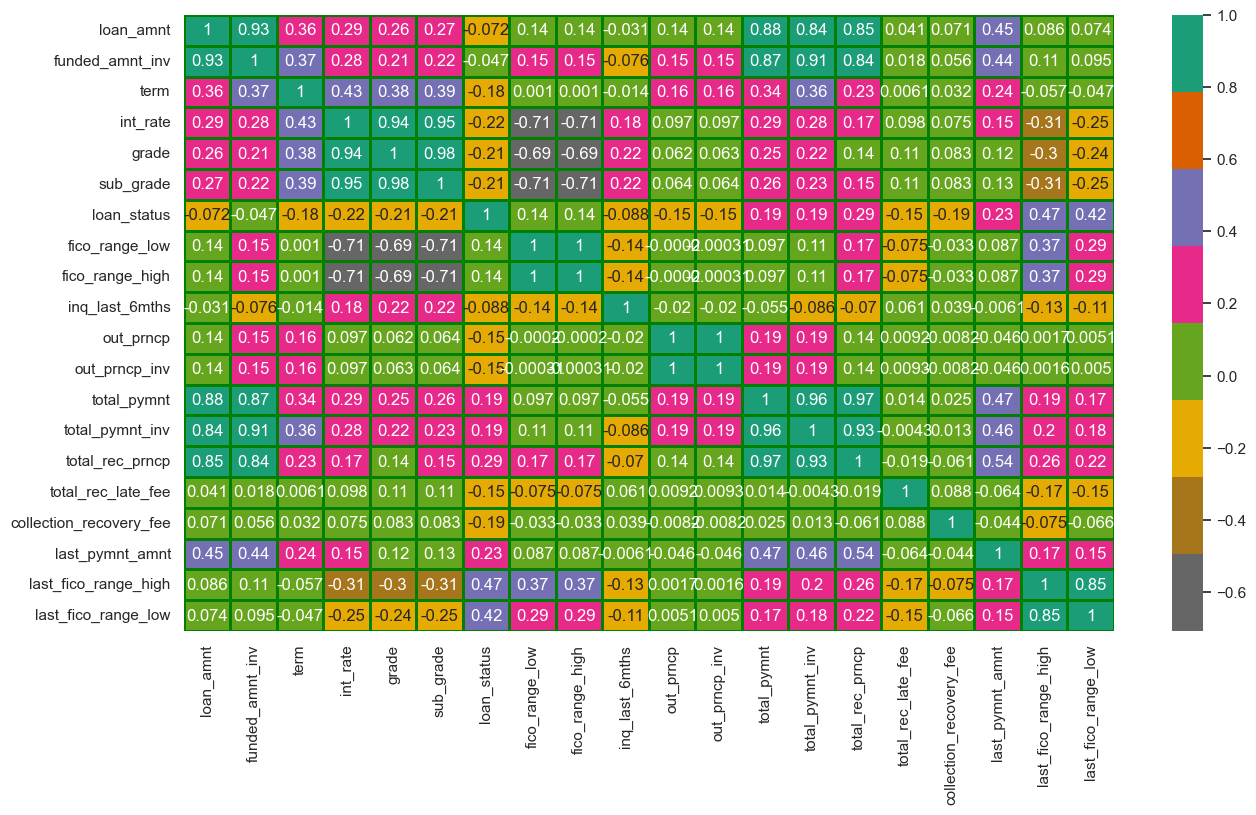

In [94]:
plt.figure(figsize=(15,8))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.heatmap(loannew.corr(),cmap='Dark2_r',annot=True,linecolor='Green',linewidth=1.0)
plt.show()

In [72]:
#sns.pairplot(loannew)

# Model building 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

## KNN

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x=loannew.drop(['loan_status'],axis=1)
y=loannew['loan_status']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [77]:
model=KNeighborsClassifier(n_neighbors=18,p=2,metric="euclidean")

In [78]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [79]:
y_pred=model.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1523
           1       0.81      0.42      0.55       144
           3       0.52      0.15      0.23       209
           4       0.45      0.05      0.09       564
           5       0.93      0.99      0.96      9459
           6       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4

    accuracy                           0.91     11907
   macro avg       0.51      0.36      0.39     11907
weighted avg       0.89      0.91      0.89     11907



In [82]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1373    5   24    1  120    0    0]
 [   0   60    0    0   84    0    0]
 [ 157    0   31    2   19    0    0]
 [   2    0    1   29  532    0    0]
 [  17    5    4   33 9400    0    0]
 [   0    2    0    0    2    0    0]
 [   0    2    0    0    2    0    0]]


## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 


In [84]:
model=DecisionTreeClassifier()

In [85]:
model=model.fit(x_train,y_train)

In [86]:
y_pred=model.predict(x_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1523
           1       0.96      0.92      0.94       144
           3       0.80      0.80      0.80       209
           4       0.78      0.77      0.78       564
           5       0.98      0.98      0.98      9459
           6       0.00      0.00      0.00         4
           8       0.12      0.25      0.17         4

    accuracy                           0.97     11907
   macro avg       0.66      0.67      0.66     11907
weighted avg       0.97      0.97      0.97     11907



In [88]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1446    0   26    2   49    0    0]
 [   0  132    0    0    0    7    5]
 [  30    0  168   10    1    0    0]
 [   1    0   16  433  114    0    0]
 [  38    0    1  108 9312    0    0]
 [   0    2    0    0    0    0    2]
 [   0    3    0    0    0    0    1]]


## Random Forest

In [89]:
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)

rf.fit(x_train, y_train)

rf_predicted = rf.predict(x_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

rf_acc_score = accuracy_score (y_test, rf_predicted)

print("confussion matrix")

print(rf_conf_matrix)

print("\n")

print("Accuracy of Random Forest: ", rf_acc_score *100, '\n')

print(classification_report (y_test, rf_predicted))

confussion matrix
[[1409    0    2    1  111    0    0]
 [   0  144    0    0    0    0    0]
 [  28    0  158   16    7    0    0]
 [   0    0    1  449  114    0    0]
 [   2    0    0   14 9443    0    0]
 [   0    4    0    0    0    0    0]
 [   0    4    0    0    0    0    0]]


Accuracy of Random Forest:  97.44687998656254 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1523
           1       0.95      1.00      0.97       144
           3       0.98      0.76      0.85       209
           4       0.94      0.80      0.86       564
           5       0.98      1.00      0.99      9459
           6       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4

    accuracy                           0.97     11907
   macro avg       0.69      0.64      0.66     11907
weighted avg       0.97      0.97      0.97     11907



## logistic regression

In [90]:
model=LogisticRegression()

In [91]:
model=model.fit(x_train,y_train)

In [92]:
y_pred=model.predict(x_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1523
           1       0.92      0.76      0.84       144
           3       0.36      0.06      0.11       209
           4       0.27      0.01      0.02       564
           5       0.93      1.00      0.96      9459
           6       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4

    accuracy                           0.92     11907
   macro avg       0.48      0.40      0.41     11907
weighted avg       0.88      0.92      0.89     11907

